In [2]:
!pip install wfdb

#https://physionet.org/content/mitdb/1.0.0/

  Obtaining dependency information for wfdb from https://files.pythonhosted.org/packages/ce/00/b83d0bd64384455dbc1f8eccb7b5d6dac23728515a9d4d74aa4def6c6fe4/wfdb-4.1.2-py3-none-any.whl.metadata
  Obtaining dependency information for requests>=2.8.1 from https://files.pythonhosted.org/packages/70/8e/0e2d847013cb52cd35b38c009bb167a1a26b2ce6cd6965bf26b47bc0bf44/requests-2.31.0-py3-none-any.whl.metadata
  Obtaining dependency information for charset-normalizer<4,>=2 from https://files.pythonhosted.org/packages/92/5e/50028bbb269986d9bc30270cd46b47ea44a1ca0b3f8da3a8429680d37050/charset_normalizer-3.3.0-cp311-cp311-win_amd64.whl.metadata
  Using cached idna-3.4-py3-none-any.whl (61 kB)
  Obtaining dependency information for urllib3<3,>=1.21.1 from https://files.pythonhosted.org/packages/26/40/9957270221b6d3e9a3b92fdfba80dd5c9661ff45a664b47edd5d00f707f5/urllib3-2.0.6-py3-none-any.whl.metadata
  Obtaining dependency information for certifi>=2017.4.17 from https://files.pythonhosted.org/packages/


[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import wfdb
wfdb.io.dl_database('mitdb', './mitdb', records='all', annotators='all', keep_subdirs=True, overwrite=False)

Generating record list for: 100
Generating record list for: 101
Generating record list for: 102
Generating record list for: 103
Generating record list for: 104
Generating record list for: 105
Generating record list for: 106
Generating record list for: 107
Generating record list for: 108
Generating record list for: 109
Generating record list for: 111
Generating record list for: 112
Generating record list for: 113
Generating record list for: 114
Generating record list for: 115
Generating record list for: 116
Generating record list for: 117
Generating record list for: 118
Generating record list for: 119
Generating record list for: 121
Generating record list for: 122
Generating record list for: 123
Generating record list for: 124
Generating record list for: 200
Generating record list for: 201
Generating record list for: 202
Generating record list for: 203
Generating record list for: 205
Generating record list for: 207
Generating record list for: 208
Generating record list for: 209
Generati

In [1]:
!pip install padasip


  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for padasip: filename=padasip-1.2.2-py3-none-any.whl size=51686 sha256=a303b709863ed4a03d8278e7cde9e1148de475003da984418be7191be5a785f5
  Stored in directory: c:\users\joaco\appdata\local\pip\cache\wheels\f6\46\46\8601522508d53a322c5fda7256ffdb9a1d634a0aaac9b12efd
Successfully built padasip



[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


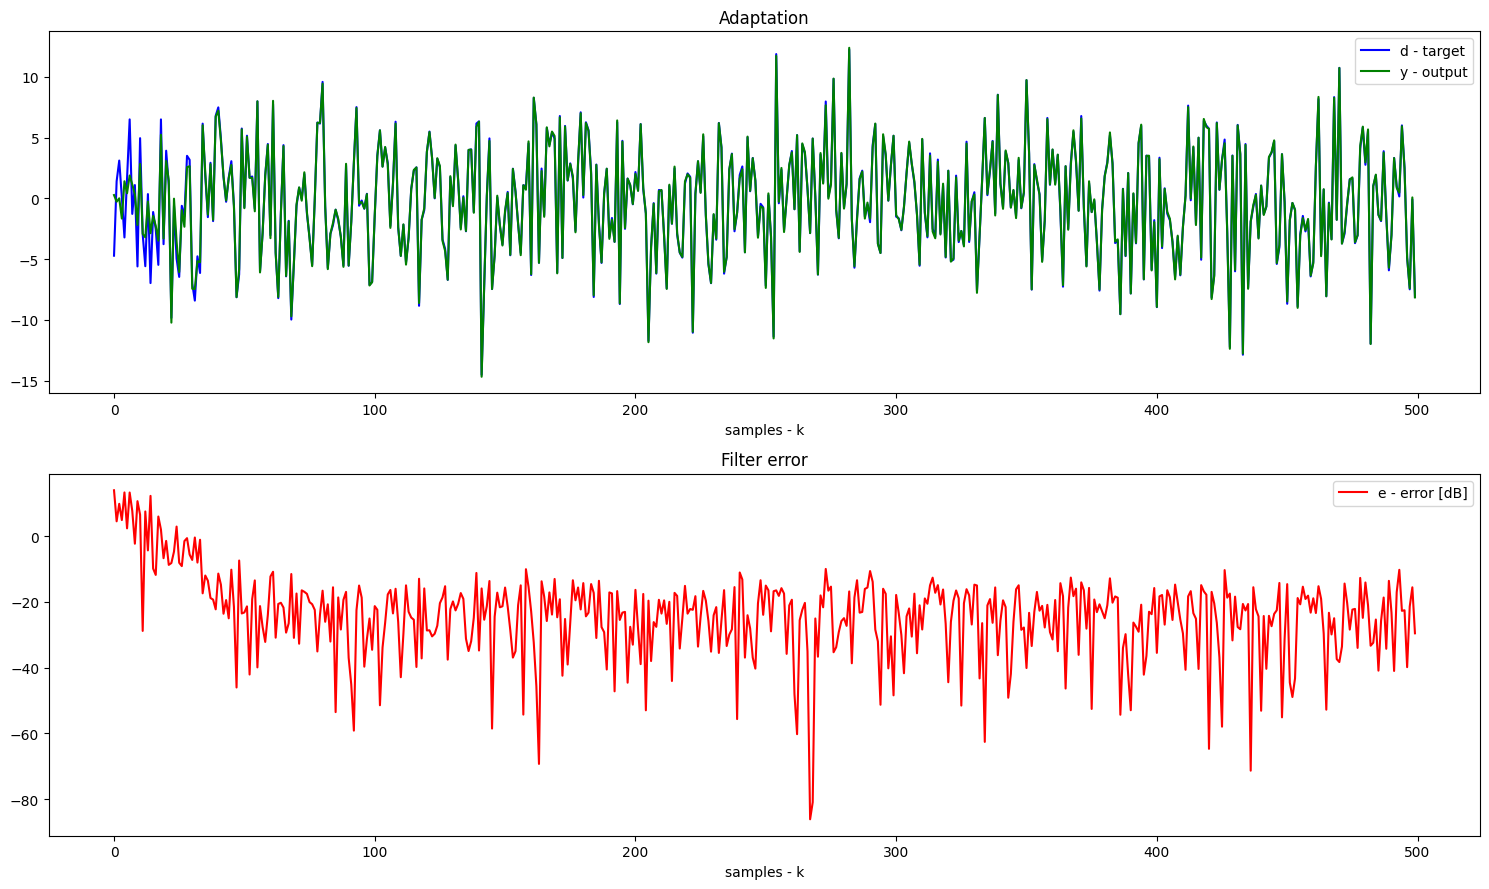

In [18]:
import numpy as np
import matplotlib.pylab as plt
import padasip as pa

# creation of data
N = 500
x = np.random.normal(0, 1, (N, 4)) # input matrix
v = np.random.normal(0, 0.1, N) # noise
d = 2*x[:,0] + 0.1*x[:,1] - 4*x[:,2] + 0.5*x[:,3] + v # target

# identification
f = pa.filters.FilterLMS(n=4, mu=0.1, w="random")
y, e, w = f.run(d, x)

# show results
plt.figure(figsize=(15,9))
plt.subplot(211);plt.title("Adaptation");plt.xlabel("samples - k")
plt.plot(d,"b", label="d - target")
plt.plot(y,"g", label="y - output");plt.legend()
plt.subplot(212);plt.title("Filter error");plt.xlabel("samples - k")
plt.plot(10*np.log10(e**2),"r", label="e - error [dB]");plt.legend()
plt.tight_layout()
plt.show()

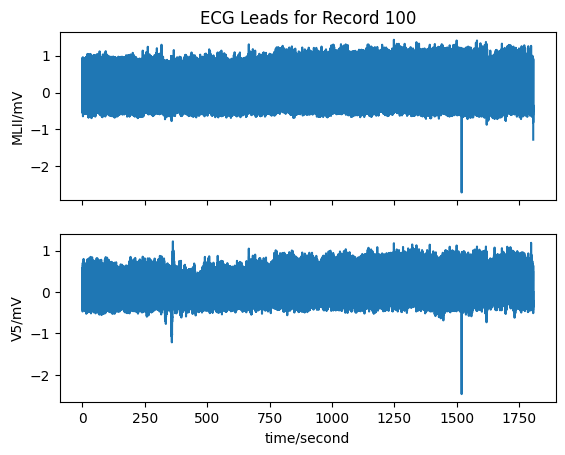

Record Name: 100
Number of Leads: 2
Sampling Frequency: 360 Hz
Record Duration: 1805.5555555555557 seconds
Lead Names: ['MLII', 'V5']


In [7]:
import wfdb
import matplotlib.pyplot as plt

# Load the ECG record from the MIT-BIH Arrhythmia Database
record_name = '100'  # Change this to the desired record name
record = wfdb.rdrecord(record_name, pn_dir='mitdb')

# Plot the ECG leads
wfdb.plot_wfdb(record=record, title=f'ECG Leads for Record {record_name}')
plt.show()

# Print additional information about the ECG record
record_info = wfdb.rdheader(record_name, pn_dir='mitdb')

print(f"Record Name: {record_info.record_name}")
print(f"Number of Leads: {record_info.n_sig}")
print(f"Sampling Frequency: {record_info.fs} Hz")
print(f"Record Duration: {record_info.sig_len / record_info.fs} seconds")
print(f"Lead Names: {record_info.sig_name}")

# You can access more information from the record_info object as needed.

In [8]:
for attr_name, attr_value in record_info.__dict__.items():
    print(f"{attr_name}: {attr_value}")

record_name: 100
n_sig: 2
fs: 360
counter_freq: None
base_counter: None
sig_len: 650000
base_time: None
base_date: None
comments: ['69 M 1085 1629 x1', 'Aldomet, Inderal']
sig_name: ['MLII', 'V5']
p_signal: None
d_signal: None
e_p_signal: None
e_d_signal: None
file_name: ['100.dat', '100.dat']
fmt: ['212', '212']
samps_per_frame: [1, 1]
skew: [None, None]
byte_offset: [None, None]
adc_gain: [200.0, 200.0]
baseline: [1024, 1024]
units: ['mV', 'mV']
adc_res: [11, 11]
adc_zero: [1024, 1024]
init_value: [995, 1011]
checksum: [-22131, 20052]
block_size: [0, 0]


In [9]:
# Extract ECG data from two leads as numpy arrays
lead1_data = record.p_signal[:, 0]  # First lead
lead2_data = record.p_signal[:, 1]  # Second lead

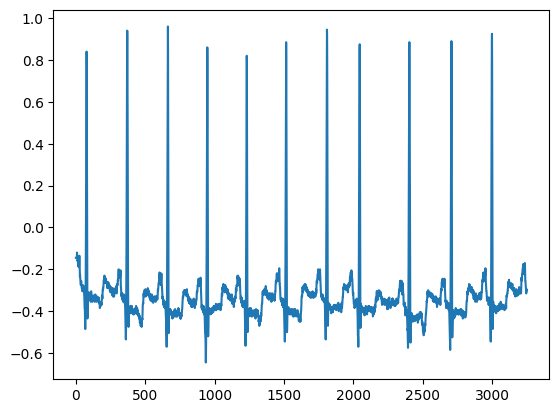

In [16]:
print()
plt.plot(lead1_data[:len(lead1_data)//200])

In [ ]:
datalen = len(lead1_data)//200

signal = lead1_data[:datalen]
desired = np.ones(datalen)





y = np.zeros(datalen)
e = np.zeros(datalen)

filt = pa.filters.FilterLMS(3, mu=0.001)
for k in range(datalen):
    # measure input
    x = signal[k]
    # predict new value
    y = filt.predict(x)
    print(y.shape)
    y[k] = filt.predict(x)
    e[k] = desired[k]-y[k]
    # do the important stuff with prediction output
    pass
    # measure output
    d = desired[k]
    # update filter
    filt.adapt(d, x)


plt.plot(y)
plt.plot(signal, 'r')

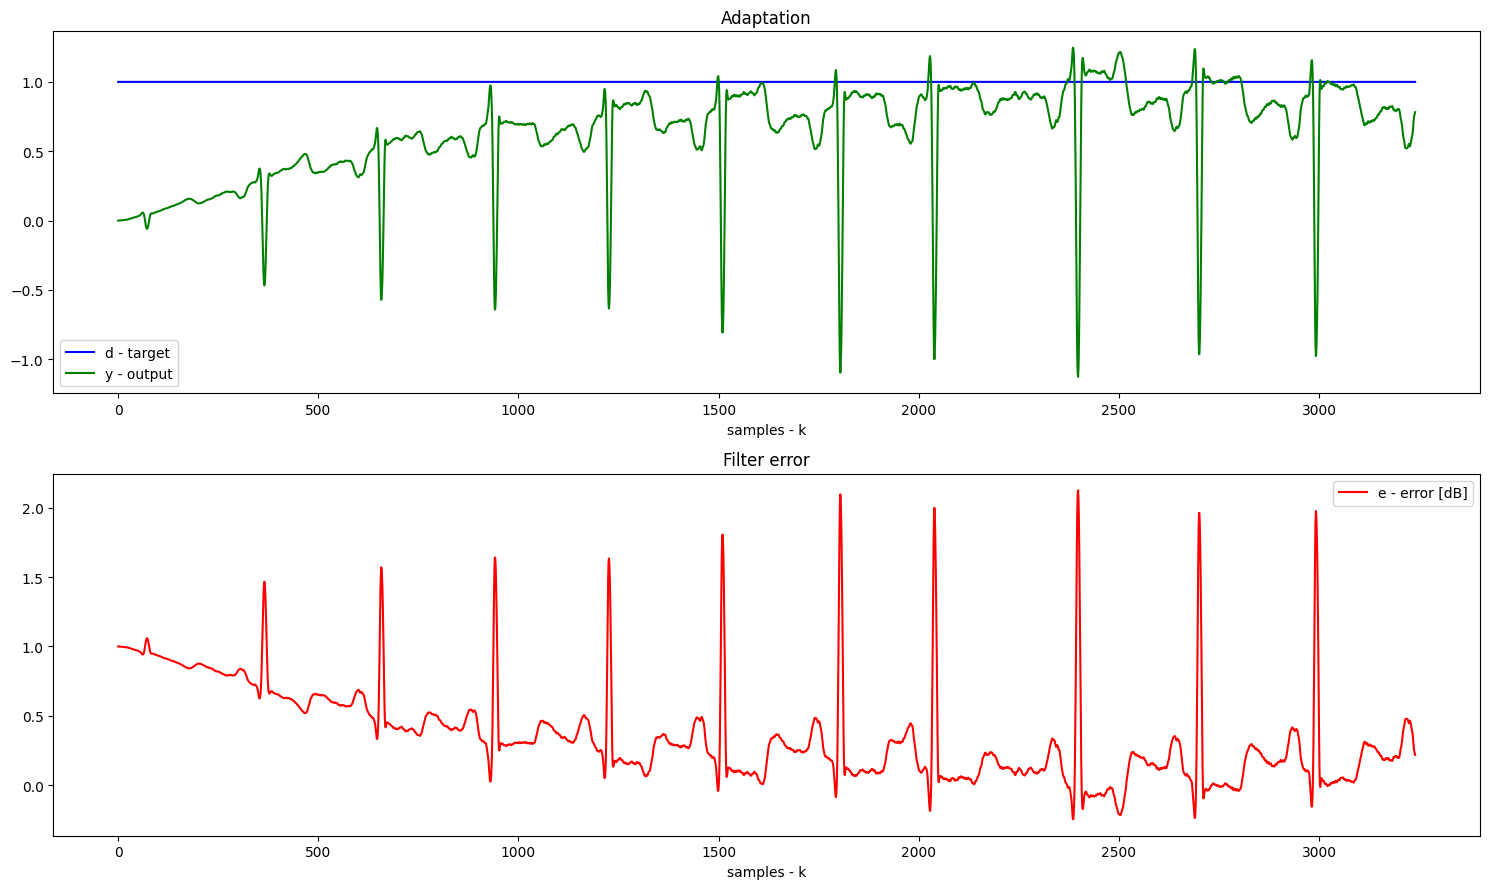

In [74]:
import numpy as np
import matplotlib.pylab as plt
import padasip as pa

# creation of data
N = len(lead1_data)//200
filt_size = 10
x = pa.input_from_history(lead1_data[:N],filt_size)
d = np.ones((-(filt_size-1)+N,1))



# identification
f = pa.filters.FilterLMS(n=filt_size, mu=0.001, w="zeros")
y, e, w = f.run(d, x)

# show results
plt.figure(figsize=(15,9))
plt.subplot(211);plt.title("Adaptation");plt.xlabel("samples - k")
plt.plot(d,"b", label="d - target")
plt.plot(y,"g", label="y - output");plt.legend()
plt.subplot(212);plt.title("Filter error");plt.xlabel("samples - k")
plt.plot(e,"r", label="e - error [dB]");plt.legend()
plt.tight_layout()
plt.show()